In [13]:
import pandas as pd # Library untuk membaca dan memanipulasi data
import matplotlib.pyplot as plt # Library untuk visualisasi data

In [14]:
# Baca CSV file
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")

In [26]:
# Informasi tentang dataframe
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   shipping_cost          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


In [15]:
# Inspeksi 5 data teratas
order_df.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,2016-10-03,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-03,e-wallet,fashion,500.0


In [53]:
# Median price yang dibayar customer dari masing-masing metode pembayaran.
median_price = order_df["price"].groupby(order_df["payment_type"]).median()\
                .reset_index()                
median_price.style.format({'price': 'Rp{:,.0f}'})\
                .hide(axis='index')\
                .highlight_max(color='green')

payment_type,price
credit card,"Rp2,587,500"
debit card,"Rp2,621,500"
e-wallet,"Rp2,589,000"
virtual account,"Rp2,643,000"


In [64]:
# Informasi tambahan: deviasi standar dari median price per payment type
print('Rp' + str(f'{int(median_price.price.std()):,}'))

Rp26,884


In [52]:
# Ubah freight_value menjadi shipping_cost dan cari shipping_cost 
# termahal dari data penjualan tersebut menggunakan sort.
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
sort_value.shipping_cost

23829    200000
12011    200000
10984    200000
29722    200000
15259    200000
          ...  
2891       9000
36815      9000
8175       9000
4034       9000
32994      9000
Name: shipping_cost, Length: 49999, dtype: int64

In [117]:
# Untuk product_category_name, berapa  rata-rata weight produk tersebut 
# dan standar deviasi mana yang terkecil dari weight tersebut, 
mean_std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"])\
                .agg({'mean', 'std'})\
                .apply(lambda x: x/1000)
mean_std_value.rename(columns={'mean': 'mean (kg)', 'std': 'std (kg)'}, inplace=True)
mean_std_value.style.highlight_min(subset='std (kg)', color='green')\
                    .format('{:.2f}')

,mean (kg),std (kg)
product_category_name,,
automotive,2.13,3.80
beauty,2.12,3.84
electronics,2.14,3.84
fashion,2.25,3.86
gadget,2.23,3.96
sports,2.25,4.03
toys,2.20,3.96
utilities,2.29,4.15


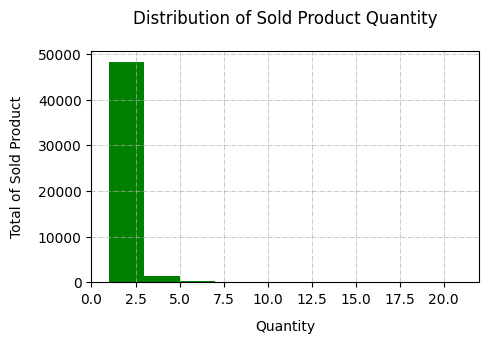

In [133]:
# Buat histogram quantity penjualan dari dataset tersebutuntuk melihat persebaran quantity 
# penjualan tersebut
order_df[["quantity"]].hist(figsize=(5, 3), bins=10, color='green')
plt.title('Distribution of Sold Product Quantity', pad=20)
plt.xlabel('Quantity', labelpad=10)
plt.ylabel('Total of Sold Product', labelpad=10)
plt.grid(linestyle='-.', linewidth=0.5)
plt.show() 